<a href="https://colab.research.google.com/github/Adrianxwu/MDO-ML-IVC-ITB-2021/blob/main/Tutorial_5_Multi_Objective_Optimization_(for_students).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUTORIAL 5: MULTI-OBJECTIVE OPTIMIZATION**

**Multidisciplinary Optimization and Machine Learning for Engineering Design International Virtual Course**

**19 July - 5 August 2021**

Written by: Yohanes Bimo Dwianto

Based on the lecture material by: Hemant Kumar Singh, Ph.D. (University of New South Wales Canberra, Australia)


---
---
# 1. Theory Overview

---
## General Form of Optimization
Suppose a minimization problem, the general form of optimization as follows,

\begin{equation} 
\begin{array}{ll}
\mbox{Minimize}     & f_i(\boldsymbol{x}),\ i=1,\ldots,N_{obj} \\
\mbox{subject to}   & g_j(\boldsymbol{x}) \le 0,\ j=1,\ldots,N_{ineq}\\
& h_k(\boldsymbol{x}) = 0,\ k=1,\ldots,N_{eq}\\
& \boldsymbol{x}_L \le \boldsymbol{x} \le \boldsymbol{x}_U
\end{array}    
\end{equation}

where 
* $\boldsymbol{x}$ denotes the $N_{var}$-dimensional solution vector
* Symbols $f_i$, $g_j$, and $h_k$ denote the $i^{th}$ objective function, the $j^{th}$ inequality constraint, and the $k^{th}$ equality constraint, respectively
* $N_{obj}$ denotes the number of objective functions
* $N_{ineq}$ and $N_{eq}$ denote the number of inequality constraints and equality constraints, respectively. Then, the number of all constraints is $N_{con}=N_{ineq}+N_{eq}$
* Both $\boldsymbol{x}_L$ and $\boldsymbol{x}_U$ denote the lower and upper bounds of the search space, respectively. 

---
## Multi-Objective Optimization 
* Multi-objective optimization (MOO) can be defined as minimization and/or maximization of a problem which has two or three objective functions. For problems with more than three objective functions, we usually use a different term, namely **many-objective optimization**. In constrast to single-objective, multi-objective optimization features the following characteristics:
  * The objective functions are **conflicting**.
  * Therefore, there are more than one optimum solution, namely Pareto-optimal solutions.
* In the case of stochastic method for solving multi-objective problem, there are three basic categories of stochastic method for MOO:
  * dominance-based (NSGA-II): utilizes **dominance relation** between individuals to find Pareto-optima,
  * decomposition-based (MOEA/D, RVEA): **decomposes the multi-objective problem into many single-objective problems**,
  * indicator-based (IBEA): utilizes indicators such as **hypervolume** to find Pareto-optima.

* Pareto-optima is found by conducting **non-dominance assessment** of the candidate solutions obtained by the end of the optimization. 
* The non-dominance assessment is conducted as follows: suppose two arbitrary solutions, i.e., $\boldsymbol{x}_1$ and $\boldsymbol{x}_2$. A solution $\boldsymbol{x}_1$ dominates (or is non-dominated by) $\boldsymbol{x}_2$ if it satisfies the following two requirements:
  * $f_i(\boldsymbol{x}_1)$ is no worse than $f_i(\boldsymbol{x}_2)$ for all indices $i=1,\ldots,N_{obj}$, and
  * $f_i(\boldsymbol{x}_1)$ is better than $f_i(\boldsymbol{x}_2)$ on at least one index $i=1,\ldots,N_{obj}$.


![picture](https://drive.google.com/uc?export=view&id=1uiHbRmvQDE1Sj9h162ayCr2YtEqYxqX7)

---



## Multi-Objective Evolutionary Algorithm (MOEA) - General Framework
In general, the main framework of MOEA is similar to that of single-objective optimization (i.e., they have crossover and mutation as the main mechanisms). The difference is primarily in the calculation of fitness value $F$, which will be discussed covered in the next section (Python coding part). Let's take a look again at the general mechanism of an EA algorithm:
* Population initialization
* Calculation of fitness values
* Parental selection
* Crossover/ recombination
* Mutation
* Environmental selection

![picture](https://drive.google.com/uc?export=view&id=1T8HdBIVAHh_1-GRW28ABp0TiZN8EZeuR)

---
## Performance Measurement - Hypervolume
Since MOO produces more than one optimum solution, it is not an easy task to measure the performance of the algorithm. The estimated Pareto-optima not only need to be as close as possible to the true Pareto-optima but should also be as diverse as possible. This means that there are at least two aspects to measure:
* convergence, and
* diversity.

These aspects can be measured either individually (e.g. convergence with generational distance metric and diversity with diversity metric) or simultaneously (e.g. by measuring the hypervolume or inverted generational distance). 

In this tutorial, we focus on **hypervolume (HV)**, which is probably the most popular metric for measuring performance in multi-objective optimization. 
The nice thing about HV is that it simultaneously measures both the convergence and the diversity in a single metric. HV works with the following procedure:
* Select a reference point, which should be dominated by the estimated/true Pareto-optima, and
* Calculate the hypervolume of the hypercube that is bounded by the reference point and each obtained solution.
* HV is the hypervolume acquired from the union of the hypercubes. **Higher value of HV indicates better performance.**

The figure below illustrates the definition of HV:

![picture](https://drive.google.com/uc?export=view&id=1a3E1xU4-sss9u_T1mtwY25z5PbLxhXM-)

---


## Decision Making
Since MOO provides many solutions, it is also not an easy task to select which solution to proceed, as it often depends on the user's preference. However, in the case of **two-objective optimization**, we have at least three interesting solutions (also see the figure below):
* the best solution for $f_1$,
* the best solution for $f_2$, and
* the compromised solution for both $f_1$ and $f_2$.

One of the method to identify the compromised solution is the **knee-point method**, which will be elaborated in the last part of this tutorial. As a side note, visualizations of high-dimensional non-dominated solutions (e.g. $N_{obj}>3$) are often done with specialized data mining techniques.

![picture](https://drive.google.com/uc?export=view&id=158VHOVClkUDP0mh1olXwUoMhGuPp6BxN)


---
---
# 2. Python Coding of Non-Dominated Sorting Genetic Algorithm II (NSGA-II)

Now let's code MOEA from scratch! In this tutorial, we will focus on NSGA-II, one of the most popular algorithm for MOO.

## Problem Inputs:
* Objective functions
* Constraint function(s), if any
* Number of design variables, $N_{var}$
* Number of objective functions, $N_{obj}$
* Number of constraints, $N_{con}$
* Search space: lower bound $lb$ and upper bound $ub$

## NSGA-II Inputs
* Population size, $N_{pop}$
* Number of generations, $N_{gen}$
* Crossover probability, $P_{cross}$
* Mutation probability, $P_{mut}$ 

**Reference:** Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan. "A fast and elitist multiobjective genetic algorithm: NSGA-II." IEEE transactions on evolutionary computation 6, no. 2 (2002): 182-197.


---
## Importing necessary packages
The necessary packages that we will use are ```numpy```, ```matplotlib``` (for visualization), and ```get_performance_indicator``` (for hypervolume calculation) from ```pymoo```. The ```pymoo``` package is not natively available in Google colaboratory. Therefore, we need to install it first with ```!pip install pymoo```.

**Reference:** Blank, Julian, and Kalyanmoy Deb. "pymoo: Multi-objective optimization in python." IEEE Access 8 (2020): 89497-89509.

In [ ]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt
!pip install pymoo
from pymoo.factory import get_performance_indicator

     |████████████████████████████████| 3.7 MB 8.0 MB/s 
     |████████████████████████████████| 239 kB 57.8 MB/s 
  Created wheel for pymoo: filename=pymoo-0.4.2.2-cp37-cp37m-linux_x86_64.whl size=4940010 sha256=9bc490fe417527960390498ddde7d1550942a8254d33fa5ebe1a27d4e1a3d63f
  Stored in directory: /root/.cache/pip/wheels/ab/8c/89/c450ad360fc24cb70fec0388e8d95b51021eae5dab248ab76e
Successfully built pymoo


---
## Defining Test Problem: 

**Unconstrained Problem: ZDT1**
Let's start with a simple multi-objective analytical problem, namely, ZDT1 (if you are wondering what ZDT stands for, it takes its name from its authors: Zitzler, Deb and Thiele). The ZDT1 problem has the following characteristics: 

* ZDT1 has the number of design variables, $N_{var}$, which may vary from one to infinity. 
* It is expressed as follows (both objectives are to be minimized):
$$f_1(\boldsymbol{x})=x_1$$
$$f_2(\boldsymbol{x})=g(\boldsymbol{x})\left[1-\sqrt{x_1-g(\boldsymbol{x})} \right]$$ 
where
$$g(\boldsymbol{x})=1+\frac{9}{N_{var}-1} \left(\sum_{i=2}^{N_{var}} x_i\right)$$. 
* The lower and upper bounds of the search space are 0 and 1, respectively, for each design variable.
* The Pareto-optima are convex, lying on $x_1 \in [0,1]$ and $x_i=0, \ i=2,\ldots,N_{var}$.

<br><br>
**Reference**:
Deb, Kalyanmoy, Samir Agrawal, Amrit Pratap, and Tanaka Meyarivan. "A fast elitist non-dominated sorting genetic algorithm for multi-objective optimization: NSGA-II." In International conference on parallel problem solving from nature, pp. 849-858. Springer, Berlin, Heidelberg, 2000.

<br><br>
**Constrained problem: Welded Beam** 

Our second test problem is the constrained welded beam problem, which creates extra challenges for EAs because we need CHT to find the feasible optimal solution. We tackled this problem in a single-objective manner, now let's do it again but with multiple objectives. Please see the illustration of the welded beam problem below:

![picture](https://drive.google.com/uc?export=view&id=157ZHCeL7ndL1virle5u72Tl9tyMEBp98)

The welded beam problem has the following characteristics: 
* Welded Beam problem has number of design variables, $N_{var}=4$ and number of constraints, $N_{con}=4$ (all inequality constraints). 
* The objective functions are to minimize (where $f_{1}$ and $f_{2}$ are cost and deflection, respectively):
$$f_1(\boldsymbol{x})=1.10471x_1^2x_2+0.04811x_3x_4(14.0+x_2)$$
$$f_2(\boldsymbol{x})=\delta(\boldsymbol{x})$$
subject to:
$$g_1(\boldsymbol{x})=\tau(\boldsymbol{x})-\tau_{max} \le 0$$
$$g_2(\boldsymbol{x})=\sigma(\boldsymbol{x})-\sigma_{max} \le 0$$
$$g_3(\boldsymbol{x})=x_1-x_4 \le 0$$
$$g_4(\boldsymbol{x})=P-P_c(\boldsymbol{x} \le 0$$
where
$$\tau(\boldsymbol{x})=\sqrt{(\tau')^2+2\tau'\tau''\frac{x_2}{2R}+(\tau'')^2}$$
$$\tau'=\frac{P}{\sqrt{2}x_1x_2},\tau''=\frac{MR}{J},M=P\left( L+\frac{x_2}{2}\right)$$
$$R=\sqrt{\frac{x_2^2}{4}+\left( \frac{x_1+x_3}{2}\right)^2}$$
$$J=2\left(\sqrt{2}x_1x_2\left[ \frac{x_2^2}{12}+\left( \frac{x_1+x_3}{2}\right)^2\right]\right)$$
$$\sigma(\boldsymbol{x})=\frac{6PL}{x_4x_3^2},\delta(\boldsymbol{x})=\frac{4PL}{x_3x_4^2}$$
$$P_c(\boldsymbol{x})=\frac{4.013E\sqrt{\frac{x_3^2x_4^6}{36}}}{L^2}\left( 1-\frac{x_3}{2L}\sqrt{\frac{E}{4G}} \right)$$
$$P=6000 \ lb, L=14 \ in, E=30 \times 10^6 \ psi, G=12 \times 10^6 \ psi$$
$$\tau_{max}=13600 \ psi, \sigma_{max}=30000 \ psi, \delta_{max}=0.25 \ in$$


<br><br>
**Reference**:
Rao, Singiresu S. Engineering optimization: theory and practice. John Wiley & Sons, 2019.

The following cell defines our test problems:

ZDT1 PROBLEM


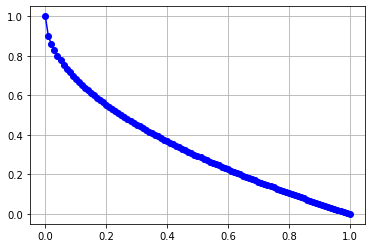


WELDED BEAM PROBLEM
f1 (Cost): [1.72485567 0.01445965]
f2 (Declection): [-0.02539959 -0.05312238  0.         -0.03155555]


In [ ]:
#@title Test Problems
def testproblem(indi_denorm,nobj,ncon,fun_name):
    nvar = indi_denorm.shape[0] # number of design variables

    if fun_name == 'ZDT1':
        temp = 1 + 9/(nvar-1)*np.sum(indi_denorm[1:])
        f1 = indi_denorm[0]
        f2 = temp*(1-np.sqrt(f1/temp))
       
        f = np.zeros(nobj)
        f[0] = f1
        f[1] = f2

    elif fun_name == 'weldedbeam':

        E = 30e6
        G = 12e6
        L = 14
        taw_max = 13600
        sigma_max = 30000
        delta_max = 0.25
        P = 6000
        c1 = 0.10471
        c2 = 0.04811
        c3 = 1

        Vweld = indi_denorm[0]**2*indi_denorm[1]
        Vbar = indi_denorm[2]*indi_denorm[3]*(L+indi_denorm[1])

        taw_d = P/(np.sqrt(2)*indi_denorm[0]*indi_denorm[1])
        M = P*(L+indi_denorm[1]/2)
        R = np.sqrt(indi_denorm[1]**2/4+((indi_denorm[0]+indi_denorm[2])/2)**2)
        J = 2*(indi_denorm[0]*indi_denorm[1]*np.sqrt(2)*(indi_denorm[1]**2/12 + ((indi_denorm[0]+indi_denorm[2])/2)**2))
        taw_dd = M*R/J
        taw = np.sqrt(taw_d**2 + 2*taw_d*taw_dd*indi_denorm[1]/(2*R) + taw_dd**2)
        sigma = 6*P*L/(indi_denorm[3]*indi_denorm[2]**2)
        delta = 4*P*L**3/(E*indi_denorm[3]*indi_denorm[2]**3)
        Pc = 4.013*E*indi_denorm[2]*indi_denorm[3]**3/(6*L**2)*(1-indi_denorm[2]/(2*L)*np.sqrt(E/(4*G)))

        f = np.zeros(nobj)
        f[0] = (c1+c3)*Vweld + c2*Vbar
        f[1] = delta

        g = np.zeros(ncon)
        g[0] = taw - taw_max
        g[1] = sigma - sigma_max
        g[2] = indi_denorm[0] - indi_denorm[3]
        g[3] = P - Pc

    if ncon == 0:
        return f
    else:
        return f,g

# TESTING - ZDT1 PROBLEM
#lb = 0*np.ones(nvar)   
#ub = 1*np.ones(nvar)   
nvar = 30
nobj = 2
ncon = 0
nsol = 101
x = np.zeros((nsol,nvar))
x[:,0] = np.linspace(0,1,nsol,endpoint=True)
fun_name = 'ZDT1'
f = np.zeros((nsol,nobj))
for i in range(nsol):
    f[i,:] = testproblem(x[i,:],nobj,ncon,fun_name)
print('ZDT1 PROBLEM')
# print('Optimum objective value:',f)

plt.plot(f[:,0],f[:,1],'bo-')
plt.grid(True)
plt.show()

# TESTING - WELDED BEAM PROBLEM   
#lb = np.array([0.125,0.1,0.1,0.125])
#ub = np.array([5,10,10,5])
fun_name = 'weldedbeam'
nvar = 4
nobj = 2
ncon = 4
x = np.array([0.20573,3.470489,9.036624,0.20573])
f = testproblem(x,nobj,ncon,fun_name)
print('\nWELDED BEAM PROBLEM')
print('f1 (Cost):',f[0])
print('f2 (Declection):',f[1])


---
## Population Initialization
The initial population can be generated either randomly or by using design of experiment (DoE) techniques such as Latin Hypercube sampling (this is the most common), Sobol sequences, Halton sequences, etc. The parameters that we define are as follows:
* population size, $N_{pop}$ and
* number of design variables, $N_{var}$.

It is common to generate population in normalized values between zero and one.

The cell below demonstrates a simple code to randomly generate initial population (if you set ```nvar=2``` then you can visualize the initial population):


In [ ]:
#@title Population Initialization
# Population Initialization
npop = 10
nvar = 30
population = np.random.rand(npop,nvar)
#print(population)

if nvar == 2:
    fig = plt.figure()
    plt.scatter(population[:,0],population[:,1])
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.show()

---
## Denormalization
Since the population is defined in a normalized value from zero to one, each variable of the individual in the population needs to be denormalized first into the real values of design variables with the following expression
$$x_{j,denorm} = x_{j,L} + (x_{j,U}-x_{j,L}) x_{j,norm}$$

We use the below function to perform the denormalization operation by using the lower and the upper bound of the ZDT1 function as an example:

In [ ]:
#@title Denormalization
def calc_denorm(individual,lb,ub):
	indi_denorm = lb + (ub-lb)*individual
	return indi_denorm

lb = 0*np.ones(nvar) # lower bound
ub = 1*np.ones(nvar)  # upper bound
x = population[0,:]
# print('Normalized x:',x)
# x1 = calc_denorm(x,lb,ub)
# print('Denormalized x:',x1)


---
## Calculating Objective and Constraint function values
The objective and constraint function values are then evaluated based on the optimization problem. In ZDT1 problem, only objective function values are evaluated because there is no constraint. Let's do a simple test, that is, we will evaluate the objective and constraint values of a random initial population for the ZDT1 and the welded beam problem:

In [ ]:
#@title Calculating Objective and Constraint
def calc_obj_con(population,fun_name,nobj,ncon,lb,ub):
    npop,nvar = population.shape
    objval = np.zeros((npop,nobj))         # initializing storing array for objective values
    if ncon == 0:
        conval = np.zeros((npop,1)) # dummy constraint for unconstrained problem
    else:
        conval = np.zeros((npop,ncon)) # initializing storing array for constraint values
      
    for i in range(npop):
        individual = population[i,:]
        indi_denorm = calc_denorm(individual,lb,ub)
        if ncon == 0:
           objval[i,:] = testproblem(indi_denorm,nobj,ncon,fun_name)
        else:
           objval[i,:],conval[i,:] = testproblem(indi_denorm,nobj,ncon,fun_name)

    return objval,conval

# Testing ZDT1 Problem
fun_name = 'ZDT1'
nvar = 30
nobj = 2
ncon = 0
lb = 0.0*np.ones(nvar) # lower bound
ub = 1.0*np.ones(nvar)  # upper bound
npop = 10
population = np.random.rand(npop,nvar)
objval,conval = calc_obj_con(population,fun_name,nobj,ncon,lb,ub)

print('ZDT1 PROBLEM')
print('objective values:',objval)
print('constraint values:',conval)

# Testing WELDED BEAM Problem
# fun_name = 'weldedbeam'
# nvar = 4
# nobj = 2
# ncon = 4
# lb = np.array([0.125,0.1,0.1,0.125])
# ub = np.array([5,10,10,5])
# npop = 10
# population = np.random.rand(npop,nvar)
# objval,conval = calc_obj_con(population,fun_name,nobj,ncon,lb,ub)

# print('\nWELDED BEAM PROBLEM')
# print('objective values:',objval)
# print('constraint values:',conval)


ZDT1 PROBLEM
objective values: [[9.71983779e-01 4.45097653e+00]
 [8.42146097e-01 3.51849943e+00]
 [1.03773038e-01 5.70908368e+00]
 [3.40266345e-01 4.30495711e+00]
 [2.99272803e-03 5.01015506e+00]
 [1.04773119e-01 5.31158903e+00]
 [6.27382273e-01 3.23622979e+00]
 [4.93861239e-01 3.81271664e+00]
 [3.57940736e-01 3.83355911e+00]
 [6.27793115e-01 3.44172537e+00]]
constraint values: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


---
## Calculating Fitness Value: Non-dominated Sorting and Crowding Distance

**Non-dominated sorting** ranks individuals based on their non-dominance relation. Suppose two arbitrary solutions, $\boldsymbol{x}_1$ and $\boldsymbol{x}_2$; in the case of **unconstrained problem**, the non-dominance relation follows the assessment as explained in the preceding section. In the case of constrained problems, $\boldsymbol{x}_1$ dominates $\boldsymbol{x}_2$ if:
* $\boldsymbol{x}_1$ is feasible and $\boldsymbol{x}_2$ is infeasible,
* both $\boldsymbol{x}_1$ and $\boldsymbol{x}_2$ are infeasible, and $\boldsymbol{x}_1$ has a lower sum of constraint violation, or
* both $\boldsymbol{x}_1$ and $\boldsymbol{x}_2$ are feasible, and $\boldsymbol{x}_1$ dominates $\boldsymbol{x}_2$ based on the non-dominance assessment from the preceding section.

**Crowding distance** quantifies the diversity level of one individual by calculating a distance equal to the sum of normalized difference of objective values for two adjacent individuals in the same front. 
<br><br>
Both domination relation and crowding distance are illustrated in the figure below:

![picture](https://drive.google.com/uc?export=view&id=1dOoFWvhwDH-4OIrIwt_dLb0uTaeITYxu)

The following code implements the non-dominated sorting and the crowding distance. We can visualize both steps since the test problems have only two objective functionss. After running the non-dominated sorting code, we can see the spreading of solutions in the objective space, as well as **the non-dominated solutions (red dots)**. Then, upon running the crowding distance code, we can **indicate the crowding distance of the non-dominated solutions**.

The fitness value $F$ of the individuals are denoted by the rank generated from non-dominated sorting and crowding distance, such as
* non-dominated sorting generates initial rank by grouping the individuals into fronts (lower front indicates better convergence), then
* in each front, individuals are ranked again based on their crowding distances (higher crowding distance is better).

Fronts: [[3, 4, 6, 7, 8], [2, 5, 9], [1], [0]]
Initial Rank: [3 2 1 0 0 1 0 0 0 1]


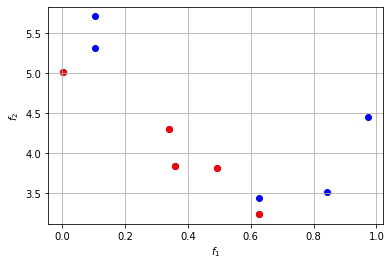

In [ ]:
#@title Non-Dominated Sorting
def fnds(objval,all_front=True,conval='None'):
    npop,nobj = objval.shape
    if conval != 'None':
        ncon = conval.shape[1]

    # Fast Nondominated Sorting
    S = [[] for i in range(npop)]
    front = [[]]
    n = np.zeros(npop,dtype='int')
    rank = np.zeros(npop,dtype='int')

    for p in range(npop):
        #print('currently assessing the dominance of individual: ',p,' out of: ',npop)
        S[p] = []
        n[p] = 0
        for q in range(npop):
            dominating = 0
            dominated = 0
            equal = 0
            for i in range(nobj):
                if conval == 'None':
                    if(objval[p,i] < objval[q,i]): # p dominates q
                        dominating = dominating + 1
                    elif(objval[p,i] > objval[q,i]): # p is dominated by q
                        dominated = dominated + 1
                    else:
                        equal = equal + 1
                else:
                    cvp = conval[p,:]
                    cvp[cvp < 0] = 0
                    cvq = conval[q,:]
                    cvq[cvq < 0] = 0

                    sumcvp = np.sum(cvp)
                    sumcvq = np.sum(cvq)
                    if sumcvp == 0 and sumcvq > 0:
                        dominating = dominating + 1
                    elif sumcvp > 0 and sumcvq == 0:    
                        dominated = dominated + 1
                    elif sumcvp > 0 and sumcvq > 0:
                        if sumcvp < sumcvq:
                            dominating = dominating + 1
                        elif sumcvp > sumcvq:
                            dominated = dominated + 1
                        else:    
                            equal = equal + 1
                    else:
                        if(objval[p,i] < objval[q,i]): # p dominates q
                            dominating = dominating + 1
                        elif(objval[p,i] > objval[q,i]): # p is dominated by q
                            dominated = dominated + 1
                        else:
                            equal = equal + 1

            sum1 = equal + dominating
            sum2 = equal + dominated
            if(dominating == nobj or (equal < nobj and sum1 == nobj)):
                S[p].append(q)
            elif(dominated == nobj or (equal < nobj and sum2 == nobj) ):
                n[p] = n[p] + 1
        if(n[p] == 0):
            rank[p] = 0
            front[0].append(p)

    if all_front == True:
        i = 0
        while(front[i] != []):
            Q = []
            for p in front[i]:
                for q in S[p]:
                    n[q] = n[q] - 1
                    if(n[q] == 0):
                        rank[q] = i + 1
                        Q.append(q)
            i = i + 1
            front.append(Q)

    front1 = front[:len(front)-1]
    return front1,rank

if fun_name == 'ZDT1':
    front,rank = fnds(objval,all_front=True)
elif fun_name == 'weldedbeam':
    front,rank = fnds(objval,all_front=True,conval=conval)
print('Fronts:',front)
print('Initial Rank:',rank)
plt.scatter(objval[:,0],objval[:,1],c='b')
plt.scatter(objval[front[0],0],objval[front[0],1],c='r')
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.grid(True)
plt.show()

Fronts: [[3, 4, 6, 7, 8], [2, 5, 9], [1], [0]]
Initial Rank: [3 2 1 0 0 1 0 0 0 1]
Crowding Distance:  [array([1.23174461,        inf,        inf, 0.76825539, 0.52347868]), array([inf,  2., inf]), array([inf]), array([inf])]
Final Rank:  [9 8 6 2 1 7 0 3 4 5]


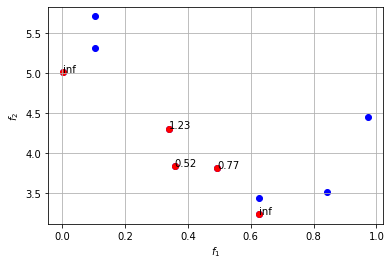

In [ ]:
#@title Crowding Distance
def cdist(objval,front,rank):
    npop,nobj = objval.shape

    nn = len(front)
    cd = []
    for i in range(nn): 
        ind_front = front[i]
        l = len(ind_front)
        distance = np.zeros(l)
        for j in range(nobj):
            ind = np.argsort(objval[ind_front,j])
            fmax = objval[ind_front[ind[l-1]],j]
            fmin = objval[ind_front[ind[0]],j]
            distance[ind[0]] = np.inf
            distance[ind[l-1]] = np.inf
            for k in range(1,l-1):
                distance[ind[k]] = distance[ind[k]] + (objval[ind_front[ind[k+1]],j]-objval[ind_front[ind[k-1]],j])/(fmax-fmin+1e-20)

        cd.append(distance)

    rank_with_cd = np.zeros(npop,dtype='int')
    start_sort = 0
    for i in range(nn): 
        ind_front = front[i]
        l = len(ind_front)
        distance = cd[i]
        ind_distance_sort = np.argsort(distance)[::-1] #descending
        for ii in range(l):
            # rank_with_cd[start_sort] = ind_front[ind_distance_sort[ii]]
            rank_with_cd[ind_front[ind_distance_sort[ii]]] = start_sort
            start_sort = start_sort + 1
          
    return rank_with_cd,cd

rank_with_cd,cd = cdist(objval,front,rank)
print('Fronts:',front)
print('Initial Rank:',rank)
print('Crowding Distance: ',cd)
print('Final Rank: ',rank_with_cd)

plt.scatter(objval[:,0],objval[:,1],c='b')
plt.scatter(objval[front[0],0],objval[front[0],1],c='r')
for i,txt in enumerate(cd[0]):
    plt.annotate(np.round(txt,2),(objval[front[0][i],0],objval[front[0][i],1]))
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.grid(True)
plt.show()


In [ ]:
#@title Calculating Fitness
def evaluate_fitval(objval,conval):
    npop,ncon = conval.shape
    fitval = np.zeros(npop)

    # Calculating constraint violation fron constraint values
    cv = conval.copy()
    cv[cv<0] = 0

    Nv = np.sum(cv>0,axis=1,dtype='int')  # counting number of constraints violated for each individual
    countfeas = np.sum(Nv==0)             # counting the number of feasible individuals

    fitval[:] = objval

    return fitval,cv,Nv

fitval,cv,Nv = evaluate_fitval(rank_with_cd,conval)
print('fitness value:',fitval)
print('\nconstraint violation:',cv)
print('\nnumber of constraints violated:',Nv)


fitness value: [9. 8. 6. 2. 1. 7. 0. 3. 4. 5.]

constraint violation: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

number of constraints violated: [0 0 0 0 0 0 0 0 0 0]


---
## Parental Selection
Parental selection is a process to select some individuals which are fit for mating and producing offspring. Some popular methods are tournament selection and roulette wheel. In this tutorial, we select **binary tournament selection**, which has the following procedure:
* select $k=2$ random individuals from the current parent population, and
* put the best individual in a matingpool.
The procedure stops when there are $N_{pop}$ individuals in the matingpool.


In [ ]:
#@title Parental Selection
def create_matingpool(population,fitval):
	npop,nvar = population.shape
	matingpool = np.zeros((npop,nvar))
	for kk in range(npop):
		ip1 = np.random.randint(npop)
		ip2 = np.random.randint(npop)
		if ip2 == ip1:
			while ip2 == ip1:
				ip2 = np.random.randint(npop)
		Ft1 = population[ip1-1,:]
		Ft2 = population[ip2-1,:]
		Fit1 = fitval[ip1-1]
		Fit2 = fitval[ip2-1]
		if Fit1 < Fit2:
			matingpool[kk,:] = Ft1
		else:
			matingpool[kk,:] = Ft2
	
	return matingpool

# matingpool = create_matingpool(population,fitval)
# print('matingpool:',matingpool)

---
## Crossover/ Recombination
* Crossover/ recombination generates new individuals with better fitness values than the old individuals. 
* In canonical EA, a pair of parents are usually selected from the mating pool to allow them producing a pair of offspring by a crossover method.
*This process is repeated until there is a population of offspring with size of $N_{pop}$. In this tutorial, we utilize **simulated binary crossover (SBX)**. Suppose $\boldsymbol{x}_1 = \{x_{1,1},\ldots,x_{d,1}\}$ and $\boldsymbol{x}_2 = \{x_{1,2},\ldots,x_{d,2}\}$ are a pair of parents, SBX generates a pair of offspring $\boldsymbol{c}_1 = \{c_{1,1},\ldots,c_{d,1}\}$ and $\boldsymbol{c}_2 = \{c_{1,2},\ldots,c_{d,2}\}$ from $\boldsymbol{x}_1$ and $\boldsymbol{x}_2$ with the following expression,
$$c_{j,1} = 0.5(x_{j,1}+x_{j,2}-\overline{\beta} |x_{j,2}-x_{j,1}|)$$
$$c_{j,2} = 0.5(x_{j,1}+x_{j,2}+\overline{\beta} |x_{j,2}-x_{j,1}|)$$
where
$$
	\overline{\beta} = \left\{
	\begin{array}{ll}
	(\alpha u)^{\frac{1}{\eta_c+1}}, & \text{if } u \leq \frac{1}{\alpha}, \\
	(\frac{1}{2-\alpha u})^{\frac{1}{\eta_c+1}}, & \text{otherwise}.
	\end{array}
	\right.
$$
where $\alpha = 2-\beta^{-(\eta_c+1)}$, and $\beta$ is calculated as follows,
$$
\beta = 1 + \frac{2}{x_{j,2}-x_{j,1}} \min(x_{j,1}-x_{j,L},x_{j,U}-x_{j,2}) \text{.}
$$
It is assumed that $x_{j,1} < x_{j,2}$ here. The symbols $u$ and $\eta_c$ denote a random value and distribution index, respectively. Here, we set $\eta_c=20$ in all experiment.

<br><br>
**Reference**:
Deb, Kalyanmoy, and Ram Bhushan Agrawal. "Simulated binary crossover for continuous search space." Complex systems 9, no. 2 (1995): 115-148.

In [ ]:
#@title Crossover
def SBX(indi1,indi2,nvar):
    nc = 20
    c1 = np.zeros(nvar)
    c2 = np.zeros(nvar)
    count = 0
    for i in range(nvar):
        nr = np.random.rand()
        if nr < 0.5:
            u = np.random.rand()
            sn = 1e-16
            if abs(indi1[i]-indi2[i]) > sn:
                if indi1[i] < indi2[i]:
                    p1 = indi1[i]
                    p2 = indi2[i]
                else:
                    p1 = indi2[i]
                    p2 = indi1[i]
                
                const1 = p1
                const2 = 1-p2
                
                beta1 = 1 + 2*const1/(p2-p1)
                beta2 = 1 + 2*const2/(p2-p1)
                alpha1 = 2 - beta1**(-(nc+1))
                alpha2 = 2 - beta2**(-(nc+1))
                
                if u <= (1/alpha1):
                    beta_l1 = (alpha1*u)**(1/(nc+1))
                else:
                    beta_l1 = (1/(2-alpha1*u))**(1/(nc+1))
                
                c1[i] = 0.5*((p1+p2)-beta_l1*abs(p2-p1))
                
                if u <= (1/alpha2):
                    beta_l2 = (alpha2*u)**(1/(nc+1))
                else:
                    beta_l2 = (1/(2-alpha2*u))**(1/(nc+1))
                
                c2[i] = 0.5*((p1+p2)+beta_l2*abs(p2-p1))

            else:
                c1[i] = indi1[i]
                c2[i] = indi2[i]
        else:
            c1[i] = indi1[i]
            c2[i] = indi2[i]
        if(c1[i] < 0 or c1[i] > 1) or (c2[i] < 0 or c2[i] > 1):
            count = count+1
        if(count > 0):
            print(count)

    c = [c1,c2]		
    return c

def crossover_process(matingpool,pcross):
    npop,nvar = matingpool.shape
    population = np.zeros((npop,nvar))
    for jj in range(0,npop,2):
        idx1 = np.random.randint(npop)
        idx2 = np.random.randint(npop)
        if idx2 == idx1:
            while idx2 == idx1:
                idx2 = np.random.randint(npop)
        n = np.random.rand()
        p1 = matingpool[idx1-1,:]
        p2 = matingpool[idx2-1,:]
        if(n < pcross):
            child = SBX(p1,p2,nvar)
            population[jj,:] = child[0]
            population[jj+1,:] = child[1]
        else:
            population[jj,:] = p1
            population[jj+1,:] = p2

    return population

# print('Parent population:',population)
# pcross = 0.9
# population = crossover_process(matingpool,pcross)
# print('\nOffspring population:',population)


---
## Mutation
* Mutation maintains the diversity of the population.
* In this tutorial, **polynomial mutation** is utilized, expressed as follows:
$$c_{j}^{'} = c_{j} + \overline{\delta} (x_{j,U}-x_{j,L})$$
where
$$
	\overline{\delta} = \left\{
	\begin{array}{ll}
	(2u+(1-2u)(1-\delta)^{\eta_m+1})^{\frac{1}{\eta_m+1}}-1, & \text{if } u \leq 0.5, \\
	1-(2(1-u)+2(u-0.5)(1-\delta)^{\eta_m+1})^{\frac{1}{\eta_m+1}}, & \text{otherwise}.
	\end{array}
	\right.
$$
where $\eta_m$ denotes the mutation distribution index. Here, we set the distribution index $\eta_m=20$ for all experiments.

<br><br>
**Reference**:
Deb, Kalyanmoy, and Debayan Deb. "Analysing mutation schemes for real-parameter genetic algorithms." International Journal of Artificial Intelligence and Soft Computing 4, no. 1 (2014): 1-28.

In [ ]:
#@title Mutation
def polymut(var,nvar,pmut):
	nm = 20
	mutchrom = var.copy()
	const = 1/(1+nm)
	for i in range(nvar):
		u = np.random.rand()
		rn = np.random.rand()
		if(rn < pmut):
			delta = min(var[i],1-var[i])
			if(u <= 0.5):
				delta2 = (2*u+(1-2*u)*(1-delta)**(nm+1))**const - 1
			else:
				delta2 = 1 - (2*(1-u)+2*(u-0.5)*(1-delta)**(nm+1))**const
			mutchrom[i] = mutchrom[i] + delta2
		if (mutchrom[i] < 0):
			mutchrom[i] = 0
		if (mutchrom[i] > 1):
			mutchrom[i] = 1
	return mutchrom

def mutation_process(population,pmut):
	npop,nvar = population.shape
	population_mut = population.copy()
	for kk in range(npop):
		var = population[kk,:]
		population_mut[kk,:] = polymut(var,nvar,pmut)
	
	return population_mut

# print('Before mutation:',population)
# pmut = 0.8
# population_mut = mutation_process(population,pmut)
# print('\nAfter mutation:',population_mut)

---
## Environmental Selection: Combining Parent and Child Populations
In NSGA-II, elitism is conducted by **combining parent and child populations** so that the current best non-dominated solutions are always preserved in every generation. 

![picture](https://drive.google.com/uc?export=view&id=1it_w6zCM4CrOeVmgFtOXLHpR3yMTQACv)

---
## Integrated NSGA-II Code
Now, we are ready to run the whole NSGA-II code. Let's integrate the functions above and do a test run!

The optimization problem can be changed by changing the ```fun_name```. 

The following cell defines our NSGA-II code:

In [ ]:
#@title Integrated NSGA-II
def nsga2(fun_name,nvar,nobj,ncon,lb,ub,npop,maxgen,pcross,pmut,cht_type=None):	

    # Obtaining initial parent population (normalized form with value between 0 and 1)
    pop_parent = np.random.rand(npop,nvar)
      
    # Calculating responses (objective and constraint values) of parent population
    objval_parent,conval_parent = calc_obj_con(pop_parent,fun_name,nobj,ncon,lb,ub)
    
    # Non-dominated sorting and crowding distance of parent population
    if ncon == 0:
        front_parent,rank_parent = fnds(objval_parent,all_front=True)
    else:
        front_parent,rank_parent = fnds(objval_parent,all_front=True,conval=conval_parent)

    rank_with_cd_parent,cd_parent = cdist(objval_parent,front_parent,rank_parent)

    # Recording current Pareto-optima solution
    pareto_pop = []
    pareto_objval = []
    pareto_conval = []
    pareto_pop.append(pop_parent[front_parent[0],:])
    pareto_objval.append(objval_parent[front_parent[0],:])
    pareto_conval.append(conval_parent[front_parent[0],:])

    # Defining fitness value (can be real values, rank from MCR, etc) of parent poopulation
    fitval_parent,cv_parent,Nv_parent = evaluate_fitval(rank_with_cd_parent,conval_parent)

    # Generational looping
    for gen in range(maxgen):
        if gen == 0:
            print('currently evaluating gen:',gen)
        else:
            print('currently evaluating gen:',gen)

        # Stopping criterion
        if gen == maxgen-1:
          break
        
        # Creating mating pool
        matingpool = create_matingpool(pop_parent,fitval_parent)
        
        # Conducting crossover
        pop_child = crossover_process(matingpool,pcross)
        
        # Conducting mutation
        pop_child_mut = mutation_process(pop_child,pmut)

        # Calculating responses (objective and constraint values) of child population
        objval_child,conval_child = calc_obj_con(pop_child_mut,fun_name,nobj,ncon,lb,ub)

        # Combining parent and child population
        pop_combined = np.vstack((pop_parent,pop_child_mut))
        objval_combined = np.vstack((objval_parent,objval_child))
        conval_combined = np.vstack((conval_parent,conval_child))

        # Non-dominated sorting and crowding distance of combined population
        if ncon == 0:
            front_combined,rank_combined = fnds(objval_combined,all_front=True)
        else:
            front_combined,rank_combined = fnds(objval_combined,all_front=True,conval=conval_combined)

        rank_with_cd_combined,cd_combined = cdist(objval_combined,front_combined,rank_combined)
        
        # Recording current Pareto-optima solution
        pareto_pop.append(pop_combined[front_combined[0],:])
        pareto_objval.append(objval_combined[front_combined[0],:])
        pareto_conval.append(conval_combined[front_combined[0],:])

        # Defining fitness value (can be real values, rank from MCR, etc) of combined poopulation
        fitval_combined,cv_combined,Nv_combined = evaluate_fitval(rank_with_cd_combined,conval_combined)

        # New population
        rank_sort = np.argsort(fitval_combined)
        pop_parent = pop_combined[rank_sort[:npop],:]
        objval_parent = objval_combined[rank_sort[:npop],:]
        conval_parent = conval_combined[rank_sort[:npop],:]
        fitval_parent = fitval_combined[rank_sort[:npop]]
        Nv_parent = Nv_combined[rank_sort[:npop]]

        # pop_parent = pop_combined[rank_with_cd_combined[:npop],:]
        # objval_parent = objval_combined[rank_with_cd_combined[:npop],:]
        # conval_parent = conval_combined[rank_with_cd_combined[:npop],:]
        # fitval_parent = fitval_combined[rank_with_cd_combined[:npop]]
        # Nv_parent = Nv_combined[rank_with_cd_combined[:npop]]

    result = [pareto_objval,pareto_pop,pareto_conval]
    return result


The following cell executes our NSGA-II code:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


currently evaluating gen: 0
currently evaluating gen: 1
currently evaluating gen: 2
currently evaluating gen: 3
currently evaluating gen: 4
currently evaluating gen: 5
currently evaluating gen: 6
currently evaluating gen: 7
currently evaluating gen: 8
currently evaluating gen: 9
currently evaluating gen: 10
currently evaluating gen: 11
currently evaluating gen: 12
currently evaluating gen: 13
currently evaluating gen: 14
currently evaluating gen: 15
currently evaluating gen: 16
currently evaluating gen: 17
currently evaluating gen: 18
currently evaluating gen: 19
currently evaluating gen: 20
currently evaluating gen: 21
currently evaluating gen: 22
currently evaluating gen: 23
currently evaluating gen: 24
currently evaluating gen: 25
currently evaluating gen: 26
currently evaluating gen: 27
currently evaluating gen: 28
currently evaluating gen: 29
currently evaluating gen: 30
currently evaluating gen: 31
currently evaluating gen: 32
currently evaluating gen: 33
currently evaluating gen

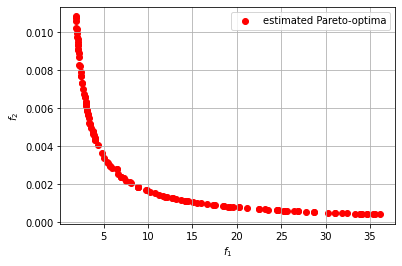

In [ ]:
#@title Running NSGA-II
#=========================================================================
# GA parameters and search space

# fun_name = 'ZDT1'
fun_name = 'weldedbeam'

npop = 100
maxgen = 100
pcross = 0.9
pmut = 0.1
	
if fun_name == 'ZDT1':
    nvar = 30
    nobj = 2
    ncon = 0
    cht_types = None
    lb = 0*np.ones(nvar)
    ub = 1*np.ones(nvar)
elif fun_name == 'weldedbeam':
    nvar = 4
    nobj = 2
    ncon = 4
    lb = np.array([0.125,0.1,0.1,0.125])
    ub = np.array([5,10,10,5])

# ========================================================================
# Optimization - Trial
result = nsga2(fun_name,nvar,nobj,ncon,lb,ub,npop,maxgen,pcross,pmut)
pareto_objval = result[0]
pareto_pop = result[1]
pareto_conval = result[2]

# print('Pareto-Optima Objective: ',pareto_objval[len(pareto_objval)-1])
# print('Pareto-Optima Population: ',pareto_pop[len(pareto_objval)-1])
# print('Pareto-Optima Constraint: ',pareto_conval[len(pareto_objval)-1])

# ========================================================================
# Plotting the convergence performance
fig = plt.figure()
plt.scatter(pareto_objval[len(pareto_objval)-1][:,0],pareto_objval[len(pareto_objval)-1][:,1],c='r',label='estimated Pareto-optima')
# for i in range(len(pareto_objval)):
#     if i == 0:
#         plt.scatter(pareto_objval[i][:,0],pareto_objval[i][:,1],c='r',label='obtained pareto')
#     else:    
#         plt.scatter(pareto_objval[i][:,0],pareto_objval[i][:,1],c='r')
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.grid()

if fun_name == 'ZDT1':
    nsol = 101
    x = np.zeros((nsol,nvar))
    x[:,0] = np.linspace(0,1,nsol,endpoint=True)
    f = np.zeros((nsol,nobj))
    for i in range(nsol):
        f[i,:] = testproblem(x[i,:],nobj,ncon,fun_name)
    plt.plot(f[:,0],f[:,1],c='b',label='Pareto-optima')

plt.legend()
plt.show()

---
# Performance Assessment: Hypervolume

In multi-objective optimization, it is important to track the progress and evolution of your non-dominated solutions. This is not a trivial problem since we are monitoring a set of solutions! Fortunately, we have metrics such as hypervolume that we can use to measure the quality of non-dominated solutions. **Remember, the set of solutions that yields the highest hypervolume value is the Pareto optima**. You want to produce a set with a high hypervolume value because it indicates that you are closer to the Pareto optima. Thus, a set of solutions with a high hypervolume value is better than that with a low value. The following cell tracks the evolution of hypervolume for your previous optimization run.

**Note:** you need to define a reference point to calculate hypervolume.

Last Hypervolume:  1.4731979356679201


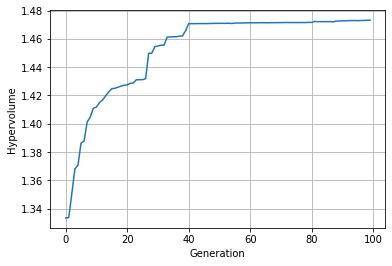

In [ ]:
#@title Hypervolume Calculation
if fun_name == 'ZDT1':
    ref = np.array([1.1,1.1])
elif fun_name == 'weldedbeam':
    ref = np.array([40,0.04])

hv = get_performance_indicator("hv", ref_point=ref)
hv_all = []
for i in range(len(pareto_objval)):
    pareto = pareto_objval[i]
    hv_val = hv.calc(pareto)
    #print(i,hv_val)
    hv_all.append(hv_val)

print('Last Hypervolume: ',hv_all[len(pareto_objval)-1])
plt.plot(np.arange(len(pareto_objval)),hv_all)
plt.xlabel('Generation')
plt.ylabel('Hypervolume')
plt.grid(True)
plt.show()    

---
---
# Decision Making
Decision-making is not really an optimization task per se. However, as a user, you eventually want to pick one interesting solution. We will show this process by using a simple decision-making method. Note that, in practice, a domain expert who thoroughly understands the optimization problem being studied can pick the solution manually by using his/her expertise (e.g. aerospace engineers know which non-dominated solution(s) is/are the most reasonable based on  their understanding of aerodynamic performance, structural strength, and manufacturability)

After the final non-dominated solutions (essentially, estimated Pareto optima) are obtained, it is time for the users to extract or pick some interesting solutions. Unless they have any preferences, users can follow the decision-making process as explained in the preceding section:
* best $f_{1}$
* best $f_{2}$
* **compromised solution**

Pay attention to the compromised solution. How should we define this? One method is the **knee-point method**, which has the following procedure:
* normalize the objective values of the obtained pareto-optima solutions, $f_{norm}=\frac{f_{pareto}-z_{ideal}}{z_{nadir}-z_{ideal}}$
* calculate Manhattan distance (L1 norm) of each solution $i$, $mdist(\boldsymbol{x}_i)=\sum_{j=1}^{N_{obj}} f_{norm}^j$, and
* set the solution with the lowest Manhattan distance as the compromised solution.

Try picking that compromised solution by executing the cell below (just imagine that point as your knee):

Best f1: [1.8292 0.0108]
Best f2: [3.61374e+01 4.00000e-04]
Compromised solution:  [7.546e+00 2.200e-03]


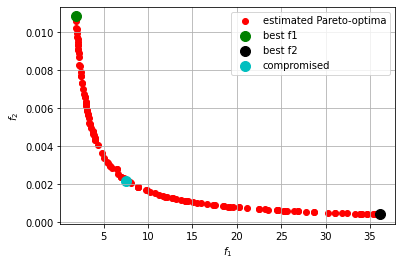

In [ ]:
#@title Decision Making
pareto_objval = result[0]
pareto_pop = result[1]
pareto_conval = result[2]

last_pareto_objval = pareto_objval[len(pareto_objval)-1]
last_pareto_pop = pareto_pop[len(pareto_objval)-1]
last_pareto_conval = pareto_conval[len(pareto_objval)-1]

# Best f1
indmin1 = np.argmin(last_pareto_objval[:,0])
best_f1 = last_pareto_objval[indmin1,:]

# Best f2
indmin2 = np.argmin(last_pareto_objval[:,1])
best_f2 = last_pareto_objval[indmin2,:]

print('Best f1:',np.around(best_f1,4))
print('Best f2:',np.around(best_f2,4))

# Compromised solution - Knee Point
z_ideal = np.amin(last_pareto_objval,axis=0) # best values of all objective functions
z_nadir = np.amax(last_pareto_objval,axis=0) # worst values of all objective functions
fnorm = np.divide(last_pareto_objval-z_ideal,z_nadir-z_ideal)

# Calculating Manhattan distance (L1 norm)
mdist = np.sum(fnorm,axis=1)
indmin_mdist = np.argmin(mdist)
compromised_f = last_pareto_objval[indmin_mdist,:]
print('Compromised solution: ',np.around(compromised_f,4))

# Plotting the convergence performance
fig = plt.figure()
plt.scatter(last_pareto_objval[:,0],last_pareto_objval[:,1],c='r',label='estimated Pareto-optima')
plt.scatter(best_f1[0],best_f1[1],label='best f1',c='g',s=100)
plt.scatter(best_f2[0],best_f2[1],label='best f2',c='k',s=100)
plt.scatter(compromised_f[0],compromised_f[1],label='compromised',c='c',s=100)
plt.xlabel(r'$f_1$')
plt.ylabel(r'$f_2$')
plt.grid()

if fun_name == 'ZDT1':
    nsol = 101
    x = np.zeros((nsol,nvar))
    x[:,0] = np.linspace(0,1,nsol,endpoint=True)
    f = np.zeros((nsol,nobj))
    for i in range(nsol):
        f[i,:] = testproblem(x[i,:],nobj,ncon,fun_name)
    plt.plot(f[:,0],f[:,1],c='b',label='Pareto-optima')

plt.legend()
plt.show()


**That's all! Thanks for listening**